In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 3*X**2 + 2*X + 1 + np.random.randn(*X.shape) * 2  # add noise


Data saved to lab01_data.csv


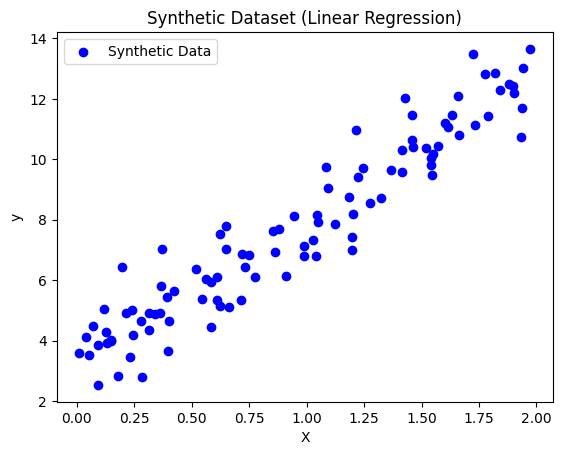

Optimal Theta: [3.18695551 4.79496004]


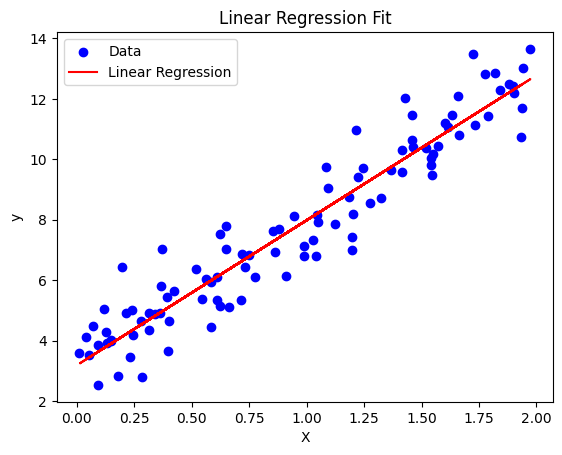

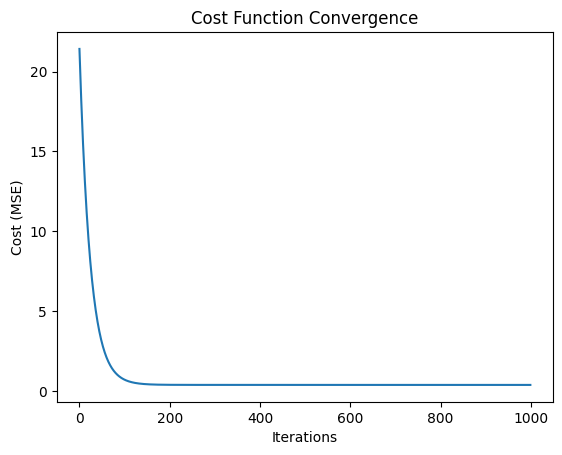

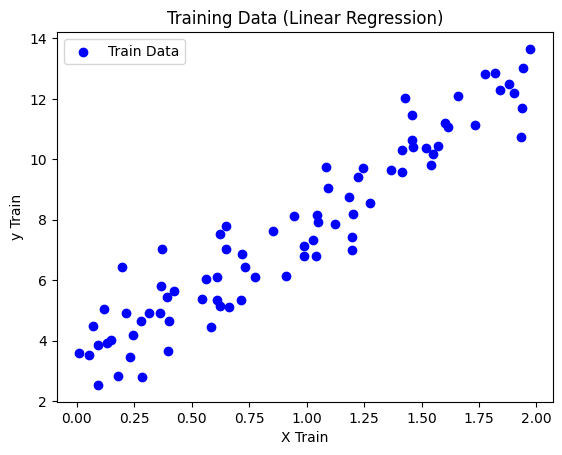

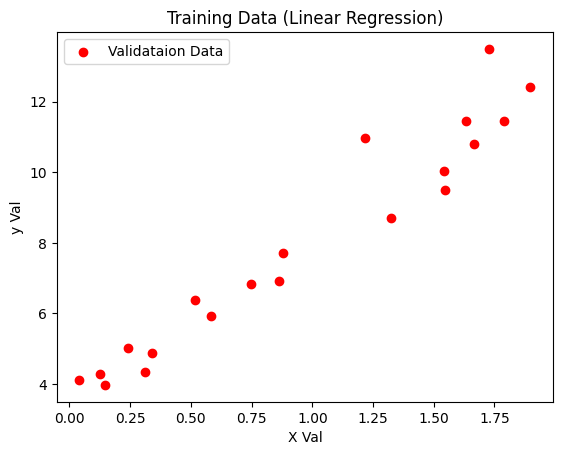

Training MSE: 0.4238
Validation MSE: 0.3264


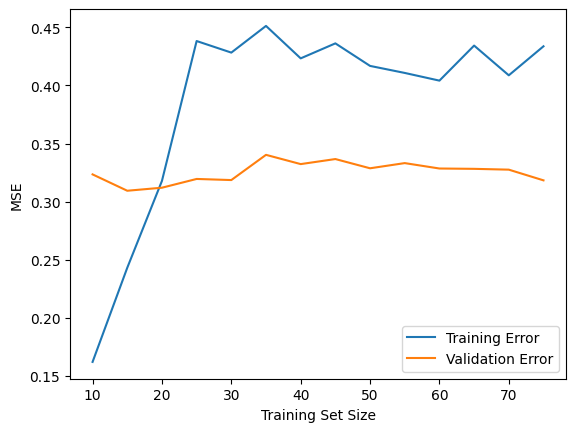

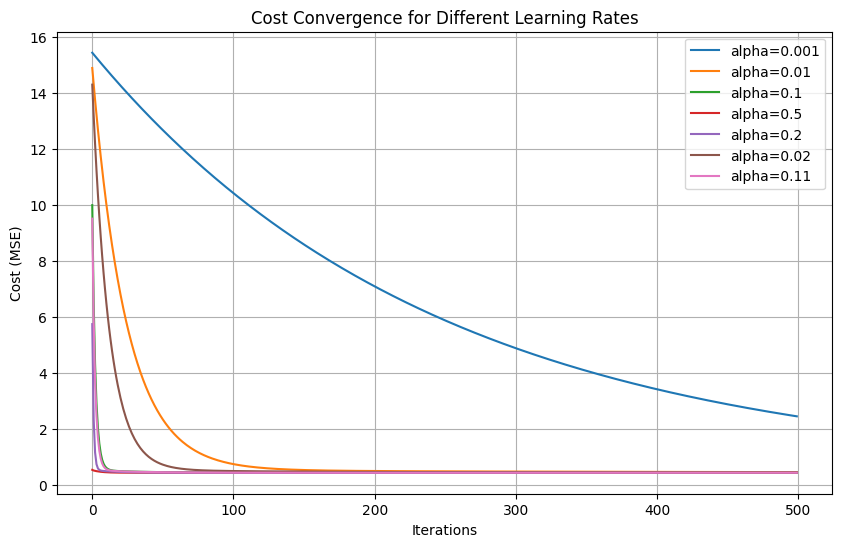

Validation MSE: 0.6366
Validation RMSE: 0.7978
Validation R² Score: 0.9306


In [7]:
import import_ipynb
import task1

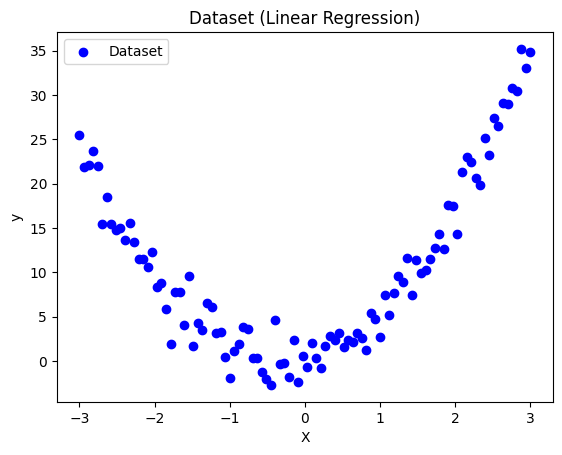

In [8]:
plt.scatter(X, y, color='blue', label='Dataset')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset (Linear Regression)")
plt.legend()
plt.show()

In [9]:
X_b = task1.process_data(X)
theta_initial = np.random.randn(2, 1)
iterations = 15000
alpha = 0.001
thetaFinal, costHistory = task1.train(X_b, y, theta_initial, alpha, iterations)

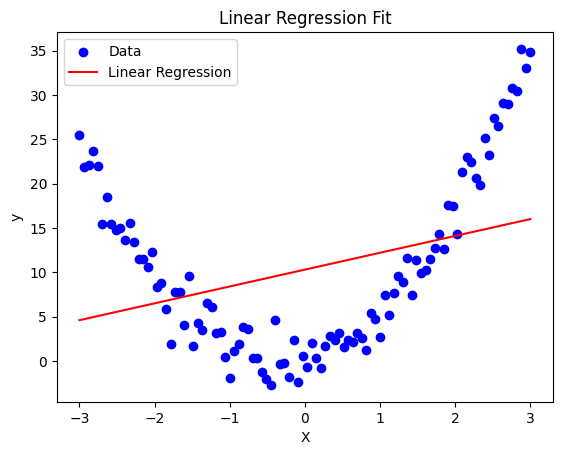

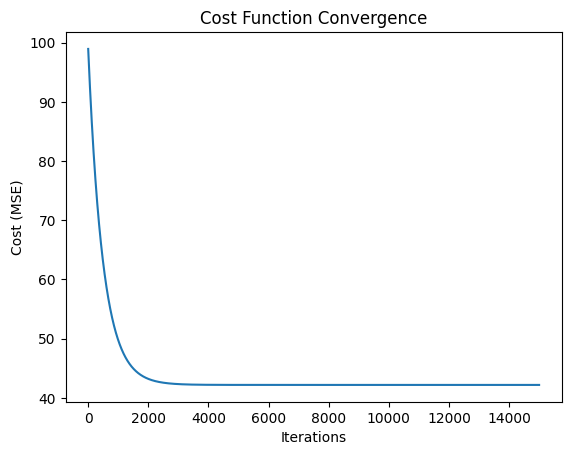

In [10]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(thetaFinal), color='red', label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

plt.plot(range(iterations), costHistory)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = task1.process_data(X_train)
X_val_b = task1.process_data(X_val)
thetaFinal, costHistory = task1.train(X_train_b, y_train, theta_initial, alpha, iterations)

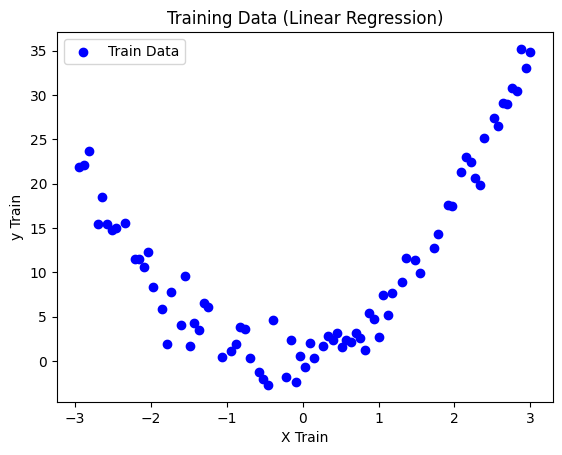

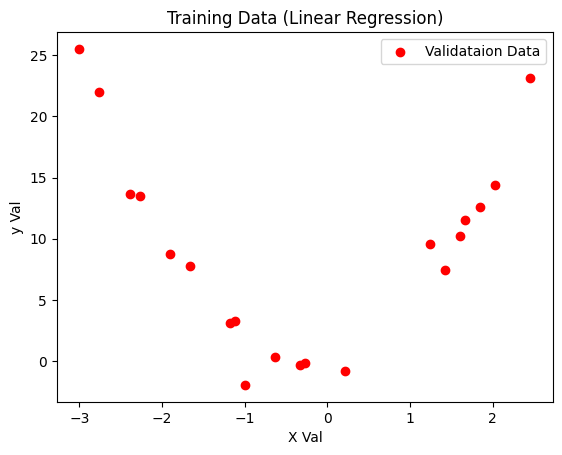

In [14]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.xlabel("X Train")
plt.ylabel("y Train")
plt.title("Training Data (Linear Regression)")
plt.legend()
plt.show()
plt.scatter(X_val, y_val, color='red', label="Validataion Data")
plt.xlabel("X Val")
plt.ylabel("y Val")
plt.title("Training Data (Linear Regression)")
plt.legend()
plt.show()

In [16]:
metrics = task1.evaluate(X_val_b, y_val, thetaFinal)
metrics

{'MSE': 83.67623901172558,
 'RMSE': np.float64(9.14747172784511),
 'R2': -0.31804834900245016}

In [18]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
print("\nPolynomial Regression Coefficients (degree 2):")
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)



Polynomial Regression Coefficients (degree 2):
Intercept: [0.23884193]
Coefficients: [[0.         1.90089105 3.28777768]]


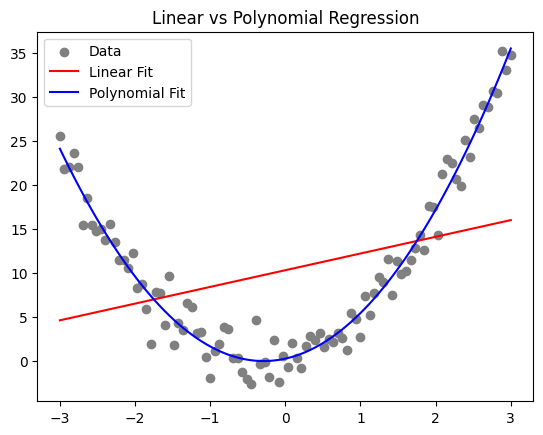

In [20]:
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, lin_reg.predict(X), label='Linear Fit', color='red')
plt.plot(X, poly_reg.predict(X_poly), label='Polynomial Fit', color='blue')
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)


In [24]:
print("Linear Regression:")
print("  Intercept:", lin_reg.intercept_)
print("  Coefficients:", lin_reg.coef_)
print("  R² score:", r2_lin)

Linear Regression:
  Intercept: [10.40114292]
  Coefficients: [[2.39344168]]
  R² score: -0.3180483490024424


In [25]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [27]:
print("\nPolynomial Regression (degree 2):")
print("  Intercept:", poly_reg.intercept_)
print("  Coefficients:", poly_reg.coef_)
print("  R² score:", r2_poly)


Polynomial Regression (degree 2):
  Intercept: [0.45423142]
  Coefficients: [[0.         2.02502339 3.25236718]]
  R² score: 0.9455140302109329


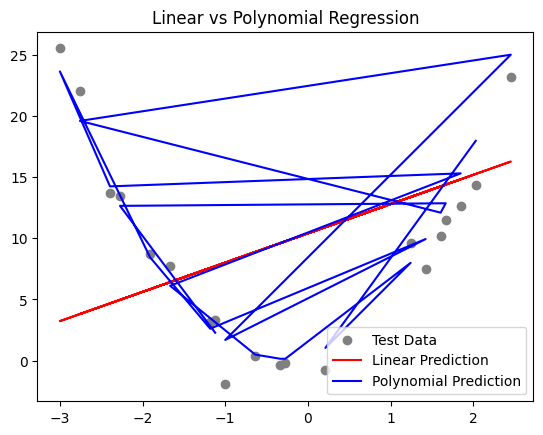

In [28]:
plt.scatter(X_test, y_test, color='gray', label='Test Data')
plt.plot(X_test, y_pred_lin, label='Linear Prediction', color='red')
plt.plot(X_test, y_pred_poly, label='Polynomial Prediction', color='blue')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()